IMPORT


In [1]:
import pandas as pd
import numpy as np
import re

LOAD CSV FILE


In [ ]:
df=pd.read_csv('imdb_final.csv')

CLEANING OF VOTES

In [47]:
def convert_votes(v):
    if isinstance(v,int):
        return v    
    v=v.strip().upper()
    if 'M' in v:
        return int(float(v.replace('M',''))*1000000)
    elif 'K' in v:
        return int(float(v.replace('K',''))*1000)
    return int(v)


df['Votes']=df['Votes'].apply(convert_votes)

CLEANING OF BOX OFFICE

In [48]:
def convert_box_office(val):
    if pd.isna(val) or not isinstance(val, str) or val.strip()=='':
        return None
    return int(re.sub(r'[^\d]', '', val))

df['Box_office']=df['Box_office'].apply(convert_box_office).astype('Int64')

CLEANING OF RUNTIME


In [50]:
def convert_runtime(rt):
    hours = minutes = 0
    if not isinstance(rt,str):
        return np.nan
    match=re.search(r'(\d+)\s*hour',rt)
    if match:
        hours=int(match.group(1))
    match=re.search(r'(\d+)\s*minute',rt)
    if match:
        minutes=int(match.group(1))
    return hours*60+minutes

df['Runtime (minutes)']=df['Runtime (minutes)'].apply(convert_runtime)

In [49]:
df.rename(columns={'Runtime':'Runtime (minutes)'}, inplace=True)

CLEANING OF DIRECTOR

In [52]:
df['Director']=df['Director'].apply(lambda x: eval(x)[0] if isinstance(x,str) and x.startswith('[') else x)

CLEANING OF GENRES


In [54]:
import ast
df['Genres']=df['Genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x,str) and x.startswith('[') else x)

CLEANING OF CASTS

In [57]:
df['Casts']=df['Casts'].apply(lambda x: ast.literal_eval(x) if isinstance(x,str) and x.startswith('[') else x)


# KPIs

## 1

TOP 10 DIRECTORS ACCORDING TO THE IMDB RATING

In [64]:
import matplotlib.pyplot as plt

top_directors=(
    df.groupby('Director')['Imdb_rating'].mean().sort_values(ascending=False).head(10)
    
)

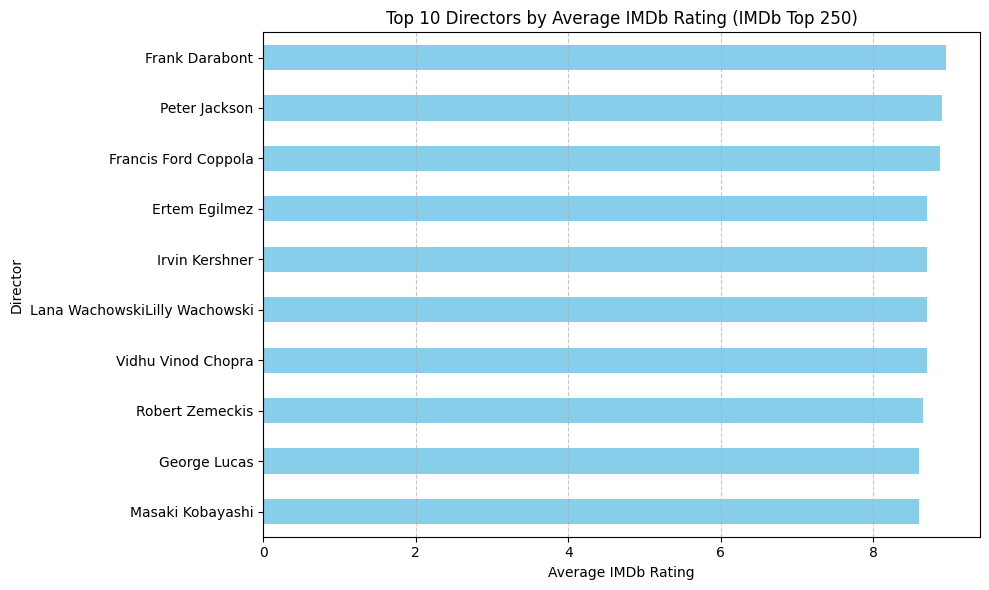

In [ ]:
plt.figure(figsize=(10, 6))
top_directors.plot(kind='barh', color='skyblue')
plt.xlabel('Average IMDb Rating')
plt.title('Top 10 Directors by Average IMDb Rating (IMDb Top 250)')
plt.gca().invert_yaxis()  # highest on top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 2

TOP GENRES BY AVERAGE BOX OFFICE

In [ ]:
df_genres=df.explode('Genres')
top_genres=(
    df_genres.groupby('Genres')['Box_office'].mean().sort_values(ascending=False).head(10)
)

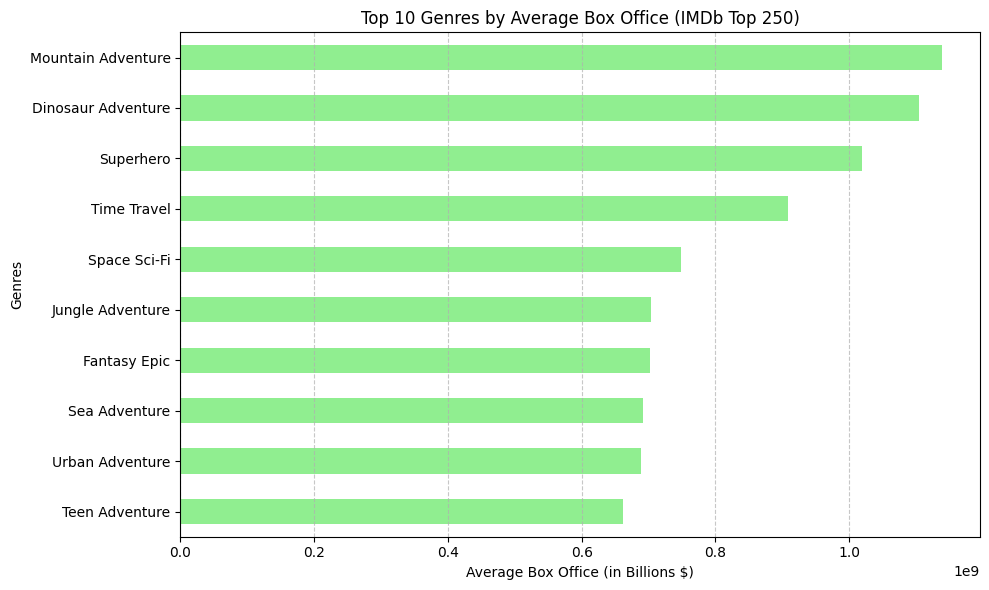

In [75]:
plt.figure(figsize=(10, 6))
top_genres.plot(kind='barh', color='lightgreen')
plt.xlabel('Average Box Office (in Billions $)')
plt.title('Top 10 Genres by Average Box Office (IMDb Top 250)')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.xticks(rotation=0)
plt.show()


## 3

IMDB RATING WITH VOTES

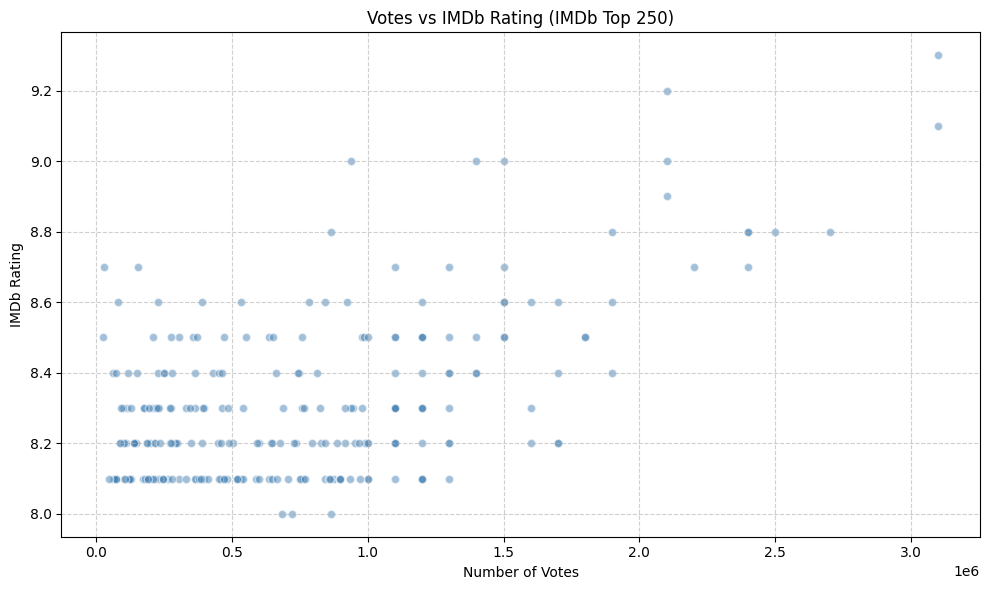

In [78]:

plt.figure(figsize=(10, 6))
plt.scatter(df['Votes'], df['Imdb_rating'], alpha=0.5, color='steelblue', edgecolor='white')
plt.xlabel('Number of Votes')
plt.ylabel('IMDb Rating')
plt.title('Votes vs IMDb Rating (IMDb Top 250)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## 4


AVERAGE IMDB RATING PER DECADE

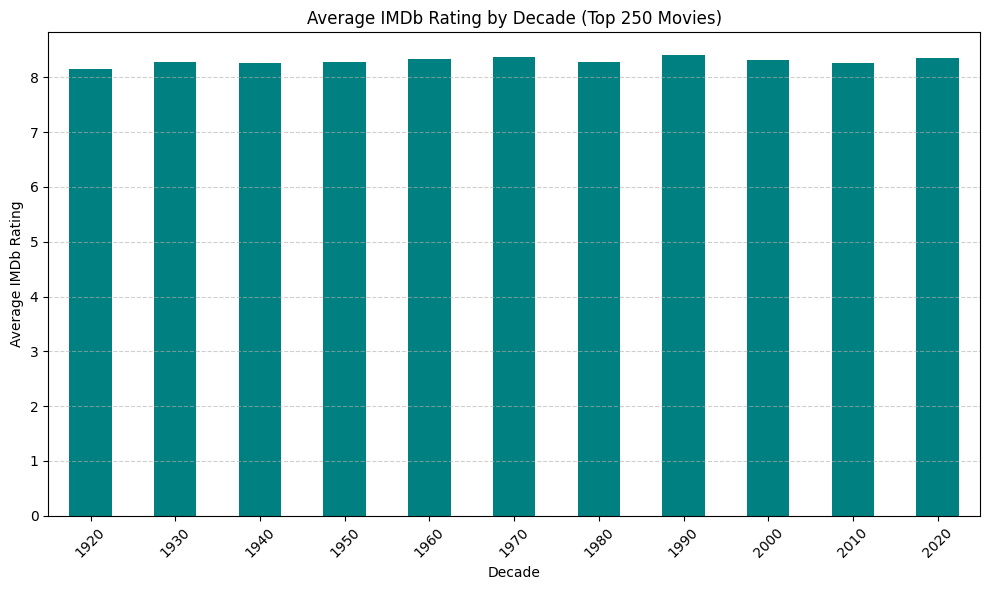

In [ ]:

df['Decade'] = (df['Year'] // 10) * 10

avg_rating_decade = df.groupby('Decade')['Imdb_rating'].mean()


plt.figure(figsize=(10, 6))
avg_rating_decade.plot(kind='bar', color='teal')
plt.xlabel('Decade')
plt.ylabel('Average IMDb Rating')
plt.title('Average IMDb Rating by Decade (Top 250 Movies)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


,Title,Year,Imdb_rating,Votes,Genres,Director,Casts,Box_office,Runtime (minutes),Decade
0,The Shawshank Redemption,1994,9.3,3100000,"[Epic, Period Drama, Prison Drama, Drama]",Frank Darabont,"[Tim Robbins, Morgan Freeman, Bob Gunton]",29334033,142,1990
1,The Godfather,1972,9.2,2100000,"[Epic, Gangster, Tragedy, Crime, Drama]",Francis Ford Coppola,"[Marlon Brando, Al Pacino, James Caan]",250342198,175,1970
2,The Dark Knight,2008,9.1,3100000,"[Action Epic, Epic, Superhero, Tragedy, Action...",Christopher Nolan,"[Christian Bale, Heath Ledger, Aaron Eckhart]",1009057329,152,2000
3,The Godfather Part II,1974,9.0,1400000,"[Epic, Gangster, Tragedy, Crime, Drama]",Francis Ford Coppola,"[Al Pacino, Robert De Niro, Robert Duvall]",47983687,202,1970
4,12 Angry Men,1957,9.0,939000,"[Legal Drama, Psychological Drama, Crime, Drama]",Sidney Lumet,"[Henry Fonda, Lee J. Cobb, Martin Balsam]",2945,96,1950
...,...,...,...,...,...,...,...,...,...,...
245,Groundhog Day,1993,8.0,722000,"[Feel-Good Romance, High-Concept Comedy, Holid...",Harold Ramis,"[Bill Murray, Andie MacDowell, Chris Elliott]",71108778,101,1990
246,The Help,2011,8.1,517000,"[Period Drama, Drama]",Tate Taylor,"[Viola Davis, Emma Stone, Octavia Spencer]",221802186,146,2010
247,Gangs of Wasseypur,2012,8.2,109000,"[Gangster, Satire, True Crime, Action, Comedy,...",Anurag Kashyap,"[Manoj Bajpayee, Nawazuddin Siddiqui, Tigmansh...",4384642,321,2010
248,Drishyam,2015,8.2,103000,"[Suspense Mystery, Crime, Drama, Mystery, Thri...",Nishikant Kamat,"[Ajay Devgn, Shriya Saran, Tabu]",<NA>,163,2010
